In [1]:
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144


In [2]:
import pandas as Pd
import numpy as np

In [3]:
accid = Pd.read_csv('NYPD_Motor_Vehicle_Collisions_-_Crashes(1).csv') # Read the data set

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
accid.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/21/2019,0:00,NaN,NaN,40.804993,-73.911354,POINT (-73.911354 40.804993),BRUCKNER EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4226544,Sedan,NaN,NaN,NaN,NaN
1,10/21/2019,12:47,NaN,NaN,40.859642,-73.899826,POINT (-73.899826 40.859642),EAST 184 STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4227310,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,10/21/2019,16:25,NaN,NaN,NaN,NaN,NaN,QUEENS MIDTOWN TUNNEL,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4227815,Taxi,LIMO,NaN,NaN,NaN
3,10/20/2019,10:25,QUEENS,11377,40.739555,-73.899506,POINT (-73.899506 40.739555),NaN,NaN,65-40 LAUREL HILL BOULEVARD,...,Unspecified,NaN,NaN,NaN,4226245,Taxi,NaN,NaN,NaN,NaN
4,10/20/2019,15:24,NaN,NaN,NaN,NaN,NaN,SOUTH CONDUIT AVENUE,LINDEN BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4226653,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [5]:
accid.isna().sum() # summation of NAN values per column

DATE                                   0
TIME                                   0
BOROUGH                           481845
ZIP CODE                          482036
LATITUDE                          195116
LONGITUDE                         195116
LOCATION                          195116
ON STREET NAME                    311215
CROSS STREET NAME                 530110
OFF STREET NAME                  1372186
NUMBER OF PERSONS INJURED             17
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       4167
CONTRIBUTING FACTOR VEHICLE 2     213398
CONTRIBUTING FACTOR VEHICLE 3    1488359
CONTRIBUTING FACTOR VEHICLE 4    1569843
CONTRIBUTING FACTOR VEHICLE 5    1585769
COLLISION_ID                           0
VEHICLE TYPE COD

In [6]:
accid["BOROUGH"].mode()

0    BROOKLYN
dtype: object

In [7]:
accid['BOROUGH'].fillna("BROOKLYN", inplace = True)  

In [8]:
accid['LATITUDE'].mode()

0    0.0
dtype: float64

In [9]:
accid['LATITUDE'].fillna("0.0", inplace = True)

In [10]:
accid["LONGITUDE"].mode()

0    0.0
dtype: float64

In [11]:
accid['LONGITUDE'].fillna("0.0", inplace = True)

In [12]:
accid["LOCATION"].mode()

0    POINT (0 0)
dtype: object

In [13]:
accid['LOCATION'].fillna("POINT (0 0)", inplace = True)

In [14]:
accid.tail() # last five records of the accid DataFrame

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1591231,07/16/2012,10:48,MANHATTAN,10013,40.7208,-74.0101,POINT (-74.0100687 40.7207545),GREENWICH STREET,BEACH STREET,NaN,...,NaN,NaN,NaN,NaN,158,TAXI,NaN,NaN,NaN,NaN
1591232,07/04/2012,12:15,BRONX,10456,40.8295,-73.9066,POINT (-73.9065701 40.8294526),EAST 167 STREET,3 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,78667,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1591233,07/05/2012,8:55,QUEENS,11106,40.7648,-73.9271,POINT (-73.9270643 40.7648208),CRESCENT STREET,31 ROAD,NaN,...,Unspecified,NaN,NaN,NaN,272609,SPORT UTILITY / STATION WAGON,TAXI,NaN,NaN,NaN
1591234,07/13/2012,16:55,MANHATTAN,10031,40.8289,-73.9504,POINT (-73.9503947 40.8289254),WEST 148 STREET,RIVERSIDE DRIVE,NaN,...,Unspecified,NaN,NaN,NaN,65029,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1591235,07/07/2012,1:30,BROOKLYN,NaN,40.7518,-73.7475,POINT (-73.7474896 40.7517671),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3078733,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [15]:
accid['DATE'].max()



'12/31/2018'

In [16]:
accid['DATE'].min()

'01/01/2013'

In [17]:
accid['NUMBER OF PERSONS KILLED'].sum()

1859.0

In [18]:
accid['NUMBER OF PERSONS KILLED'].mean()

0.0011682969824755452

In [19]:
accid['VEHICLE TYPE CODE 1'].value_counts(dropna=False) 
# value count for each type of vehicle involved in crash in 'VEHICLE TYPE CODE 1' column

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  149461
Station Wagon/Sport Utility Vehicle    120561
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    15415
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
LIVERY VEHICLE                          10481
Pick-up Truck                           10026
Box Truck                                7873
MOTORCYCLE                               6536
Bus                                      6452
BICYCLE                                  5568
NaN                                      5268
Bike                                     3883
Tractor Truck Diesel              

In [20]:
accid['VEHICLE TYPE CODE 2'].value_counts(dropna=False) 
# value count for each type of vehicle involved in crash in 'VEHICLE TYPE CODE 2' column

PASSENGER VEHICLE                         537550
NaN                                       261578
SPORT UTILITY / STATION WAGON             237846
Sedan                                     111601
Station Wagon/Sport Utility Vehicle        93892
UNKNOWN                                    81454
TAXI                                       41976
BICYCLE                                    26945
OTHER                                      25785
VAN                                        24397
PICK-UP TRUCK                              21542
SMALL COM VEH(4 TIRES)                     15869
LARGE COM VEH(6 OR MORE TIRES)             13970
Taxi                                       12259
BUS                                        11558
Pick-up Truck                               9396
LIVERY VEHICLE                              8458
Box Truck                                   8259
Bike                                        6601
MOTORCYCLE                                  5963
Bus                 

In [21]:
accid['VEHICLE TYPE CODE 3'].value_counts(dropna=False) 
#value count for each type of vehicle involved in crash in 'VEHICLE TYPE CODE 2' column

NaN                                    1459217
PASSENGER VEHICLE                        63655
SPORT UTILITY / STATION WAGON            33161
Sedan                                    10120
Station Wagon/Sport Utility Vehicle       8352
UNKNOWN                                   3285
TAXI                                      3218
PICK-UP TRUCK                             2292
VAN                                       1489
OTHER                                     1108
Taxi                                       643
Pick-up Truck                              565
BICYCLE                                    533
SMALL COM VEH(4 TIRES)                     479
MOTORCYCLE                                 464
LARGE COM VEH(6 OR MORE TIRES)             448
LIVERY VEHICLE                             424
BUS                                        403
Box Truck                                  191
Bus                                        118
Motorcycle                                  98
Bike         

In [22]:
accid['VEHICLE TYPE CODE 3'].value_counts(dropna=False) 
#value count for each type of vehicle involved in crash in 'VEHICLE TYPE CODE 3' column

NaN                                    1459217
PASSENGER VEHICLE                        63655
SPORT UTILITY / STATION WAGON            33161
Sedan                                    10120
Station Wagon/Sport Utility Vehicle       8352
UNKNOWN                                   3285
TAXI                                      3218
PICK-UP TRUCK                             2292
VAN                                       1489
OTHER                                     1108
Taxi                                       643
Pick-up Truck                              565
BICYCLE                                    533
SMALL COM VEH(4 TIRES)                     479
MOTORCYCLE                                 464
LARGE COM VEH(6 OR MORE TIRES)             448
LIVERY VEHICLE                             424
BUS                                        403
Box Truck                                  191
Bus                                        118
Motorcycle                                  98
Bike         

In [23]:
accid['VEHICLE TYPE CODE 1'].mode()

0    PASSENGER VEHICLE
dtype: object

In [24]:
accid['VEHICLE TYPE CODE 1'].fillna("PASSENGER VEHICLE", inplace = True)

In [25]:
accid['VEHICLE TYPE CODE 2'].mode()

0    PASSENGER VEHICLE
dtype: object

In [26]:
accid['VEHICLE TYPE CODE 2'].fillna("PASSENGER VEHICLE", inplace = True)

In [27]:
accid['VEHICLE TYPE CODE 3'].mode()

0    PASSENGER VEHICLE
dtype: object

In [28]:
accid['VEHICLE TYPE CODE 3'].fillna("PASSENGER VEHICLE", inplace = True)

In [29]:
accid['VEHICLE TYPE CODE 4'].mode()

0    PASSENGER VEHICLE
dtype: object

In [30]:
accid['VEHICLE TYPE CODE 4'].fillna("PASSENGER VEHICLE", inplace = True)

In [31]:
accid['VEHICLE TYPE CODE 5'].mode()

0    PASSENGER VEHICLE
dtype: object

In [32]:
accid['VEHICLE TYPE CODE 5'].fillna("PASSENGER VEHICLE", inplace = True)

In [33]:
accid['LOCATION'].fillna("POINT (0 0)", inplace = True)

In [34]:
accid['ZIP CODE'].mode()   # Most frequent value of the ZIP CODE column

0    11207
dtype: object

In [35]:
accid['ZIP CODE'] = accid['ZIP CODE'].fillna(11207) 
# Using the most frequent value of the ZIP CODE column to fill the missing values

In [36]:
accid.head()
# First five records for the dataframe 
# accid after filling the missen values of ZIP CODE column using the most frequent value

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/21/2019,0:00,BROOKLYN,11207,40.805,-73.9114,POINT (-73.911354 40.804993),BRUCKNER EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4226544,Sedan,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1,10/21/2019,12:47,BROOKLYN,11207,40.8596,-73.8998,POINT (-73.899826 40.859642),EAST 184 STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4227310,Station Wagon/Sport Utility Vehicle,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
2,10/21/2019,16:25,BROOKLYN,11207,0.0,0.0,POINT (0 0),QUEENS MIDTOWN TUNNEL,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4227815,Taxi,LIMO,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
3,10/20/2019,10:25,QUEENS,11377,40.7396,-73.8995,POINT (-73.899506 40.739555),NaN,NaN,65-40 LAUREL HILL BOULEVARD,...,Unspecified,NaN,NaN,NaN,4226245,Taxi,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
4,10/20/2019,15:24,BROOKLYN,11207,0.0,0.0,POINT (0 0),SOUTH CONDUIT AVENUE,LINDEN BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4226653,Station Wagon/Sport Utility Vehicle,Sedan,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE


In [37]:
accid.tail() 
# Last five records for the dataframe accid
# after filling the missen values of ZIP CODE column using the most frequent value

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1591231,07/16/2012,10:48,MANHATTAN,10013,40.7208,-74.0101,POINT (-74.0100687 40.7207545),GREENWICH STREET,BEACH STREET,NaN,...,NaN,NaN,NaN,NaN,158,TAXI,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1591232,07/04/2012,12:15,BRONX,10456,40.8295,-73.9066,POINT (-73.9065701 40.8294526),EAST 167 STREET,3 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,78667,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1591233,07/05/2012,8:55,QUEENS,11106,40.7648,-73.9271,POINT (-73.9270643 40.7648208),CRESCENT STREET,31 ROAD,NaN,...,Unspecified,NaN,NaN,NaN,272609,SPORT UTILITY / STATION WAGON,TAXI,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1591234,07/13/2012,16:55,MANHATTAN,10031,40.8289,-73.9504,POINT (-73.9503947 40.8289254),WEST 148 STREET,RIVERSIDE DRIVE,NaN,...,Unspecified,NaN,NaN,NaN,65029,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1591235,07/07/2012,1:30,BROOKLYN,11207,40.7518,-73.7475,POINT (-73.7474896 40.7517671),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3078733,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE


In [38]:
accid['COLLISION_ID'].count() 
# Total number of collisions for the period considered

1591236

In [39]:
accid.columns
# displays all the columns in accid dataframe

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [40]:
inj = accid['NUMBER OF PERSONS INJURED'] > 0 # Generate the boolean series of True and False values

In [41]:
inj.head()

0    False
1    False
2    False
3    False
4     True
Name: NUMBER OF PERSONS INJURED, dtype: bool

In [42]:
injured = accid['NUMBER OF PERSONS INJURED'].loc[inj]

In [43]:
injured.head()

4     1.0
10    1.0
13    4.0
19    1.0
20    2.0
Name: NUMBER OF PERSONS INJURED, dtype: float64

In [44]:
accid['NUMBER OF PERSONS INJURED'].loc[inj].sum() 
#Total number of people that
#sustained injuries during all the period considered 

417416.0

In [45]:
kil = accid['NUMBER OF PERSONS KILLED'] > 0 # Generates booleans series of True and False values in reference
# to NUMBER OF PERSONS KILLED column,

In [46]:
kil.head() # First five records of Kil series

0    False
1    False
2    False
3    False
4    False
Name: NUMBER OF PERSONS KILLED, dtype: bool

In [47]:
killed = accid['NUMBER OF PERSONS KILLED'].loc[kil]

In [48]:
killed.head()   # Number of people greater than 0, killed during each accident

77     1.0
241    1.0
312    1.0
415    1.0
462    1.0
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [49]:
accid['NUMBER OF PERSONS KILLED'].loc[kil].sum() # Total Number # Total number of people killed during the period considered

1859.0

In [50]:
accid['DATE'].max() # Last date of the records.

'12/31/2018'

In [51]:
accid['DATE'].min() # First date of the records.

'01/01/2013'

In [52]:
  # This data collection spanned over six years, from  01/01/2013 to 12/31/2018

In [53]:
accid = accid[['DATE', 'TIME', 'BOROUGH', 'ZIP CODE','LATITUDE', 'LONGITUDE', 'LOCATION',
               'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5']] # Dropping columns of accid dataframe that may not be of use 
# this process part of data cleaninig

In [54]:
accid.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [55]:
accid.head() # first five columns of the accid dataframe

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/21/2019,0:00,BROOKLYN,11207,40.805,-73.9114,POINT (-73.911354 40.804993),0.0,0.0,0,...,0,0,0,0,4226544,Sedan,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1,10/21/2019,12:47,BROOKLYN,11207,40.8596,-73.8998,POINT (-73.899826 40.859642),0.0,0.0,0,...,0,0,0,0,4227310,Station Wagon/Sport Utility Vehicle,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
2,10/21/2019,16:25,BROOKLYN,11207,0.0,0.0,POINT (0 0),0.0,0.0,0,...,0,0,0,0,4227815,Taxi,LIMO,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
3,10/20/2019,10:25,QUEENS,11377,40.7396,-73.8995,POINT (-73.899506 40.739555),0.0,0.0,0,...,0,0,0,0,4226245,Taxi,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
4,10/20/2019,15:24,BROOKLYN,11207,0.0,0.0,POINT (0 0),1.0,0.0,0,...,0,0,1,0,4226653,Station Wagon/Sport Utility Vehicle,Sedan,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE


In [56]:
# Using COLLISION_ID as index to plot the number of persons injured or killed 
# in each situation where death was recorded

In [60]:
accid.loc[accid['NUMBER OF PEDESTRIANS INJURED'] >= 10, ['DATE', 'TIME', 'BOROUGH', 
                                                   'ZIP CODE','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID',  'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]

,DATE,TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
564432,05/18/2017,11:54,MANHATTAN,10036,27.0,1.0,27,1,0,0,0,0,3673559,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1157226,08/05/2014,15:26,MANHATTAN,10036,15.0,0.0,13,0,0,0,2,0,1004348,BUS,BUS,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE
1191751,06/28/2014,18:30,QUEENS,11103,16.0,0.0,15,0,0,0,1,0,359450,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE


In [62]:
accid.loc[accid['NUMBER OF PERSONS KILLED'] >= 8, ['DATE', 'TIME', 'BOROUGH', 
                                                   'ZIP CODE','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID',  'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]

,DATE,TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
445283,10/31/2017,15:08,MANHATTAN,10014,12.0,8.0,7,6,1,2,4,0,3782508,FB,BU,BICYCLE,BICYCLE,BICYCLE


In [64]:
accid.loc[accid['NUMBER OF CYCLIST INJURED'] >= 3, ['DATE', 'TIME', 'BOROUGH', 
                                                   'ZIP CODE','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID',  'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]

,DATE,TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
110152,04/09/2019,14:47,QUEENS,11691,3.0,0.0,0,0,3,0,0,0,4112561,Bike,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
476250,09/10/2017,9:06,BROOKLYN,11218,3.0,1.0,0,0,3,1,0,0,3747815,SPORT UTILITY / STATION WAGON,BICYCLE,BICYCLE,BICYCLE,BICYCLE
552553,04/29/2017,15:45,BROOKLYN,11207,3.0,0.0,0,0,3,0,0,0,3659838,BICYCLE,BICYCLE,BICYCLE,PASSENGER VEHICLE,PASSENGER VEHICLE
683532,09/26/2016,19:13,QUEENS,11368,3.0,0.0,0,0,3,0,0,0,3535344,BICYCLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
777480,05/27/2016,7:45,BROOKLYN,11207,3.0,0.0,0,0,3,0,0,0,4022433,Bike,Bike,Bike,PASSENGER VEHICLE,PASSENGER VEHICLE
946848,09/06/2015,20:00,BRONX,10453,3.0,0.0,0,0,3,0,0,0,3292177,LIVERY VEHICLE,BICYCLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
963796,07/20/2015,21:00,BROOKLYN,11207,3.0,0.0,0,0,3,0,0,0,3262462,SPORT UTILITY / STATION WAGON,BICYCLE,BICYCLE,BICYCLE,PASSENGER VEHICLE
999213,05/26/2015,17:20,MANHATTAN,10019,3.0,0.0,0,0,3,0,0,0,3228162,LIVERY VEHICLE,PEDICAB,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1122517,10/18/2014,19:30,BROOKLYN,11207,3.0,0.0,0,0,3,0,0,0,2810341,PASSENGER VEHICLE,BICYCLE,BICYCLE,BICYCLE,PASSENGER VEHICLE
1144635,09/21/2014,12:25,BROOKLYN,11207,3.0,0.0,0,0,3,0,0,0,1027853,PASSENGER VEHICLE,BICYCLE,BICYCLE,BICYCLE,PASSENGER VEHICLE


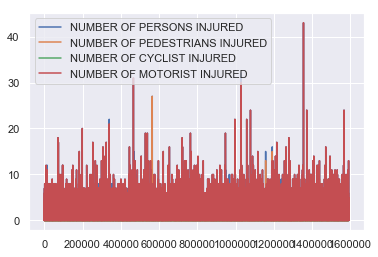

In [83]:

injury_data = accid[['NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED',
                   'NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED']]
index='COLLISION_ID'

injury_data.plot() # injury data plots
                    

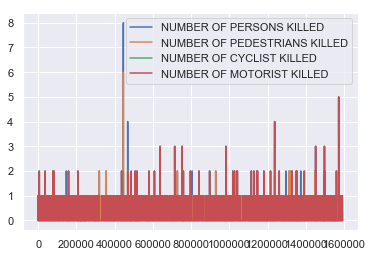

In [82]:
casualty_data = accid[['NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED',
                   'NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED']]


index='COLLISION_ID'

casualty_data.plot() # casualty_data plots

In [70]:
casualty_data.head()

,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST KILLED
0,0.0,0,0,0
1,0.0,0,0,0
2,0.0,0,0,0
3,0.0,0,0,0
4,0.0,0,0,0


In [71]:
accid.loc[accid['NUMBER OF PERSONS KILLED'] >= 8, ['DATE', 'TIME', 'BOROUGH', 
                                                   'ZIP CODE','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID',  'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]

,DATE,TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
445283,10/31/2017,15:08,MANHATTAN,10014,12.0,8.0,7,6,1,2,4,0,3782508,FB,BU,BICYCLE,BICYCLE,BICYCLE


In [72]:
accid.loc[accid['NUMBER OF PERSONS KILLED'] >3, ['DATE', 'TIME', 'BOROUGH', 
                                                   'ZIP CODE','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']]

,DATE,TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
445283,10/31/2017,15:08,MANHATTAN,10014,12.0,8.0,7,6,1,2,4,0,3782508
467967,09/18/2017,6:17,QUEENS,11354,15.0,4.0,3,2,0,0,12,2,3752786
1236293,04/04/2014,22:35,QUEENS,11105,1.0,4.0,0,0,0,0,1,4,316814
1570998,07/22/2012,3:20,QUEENS,11418,3.0,5.0,0,0,0,0,3,5,208863


In [73]:
accid.loc[accid['NUMBER OF PEDESTRIANS KILLED'] >3, ['DATE', 'TIME', 'BOROUGH', 
                                                   'ZIP CODE','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']]

,DATE,TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
445283,10/31/2017,15:08,MANHATTAN,10014,12.0,8.0,7,6,1,2,4,0,3782508


In [74]:
overall_data = accid[['ZIP CODE', 'NUMBER OF PERSONS KILLED']]

overall_data.head()

,ZIP CODE,NUMBER OF PERSONS KILLED
0,11207,0.0
1,11207,0.0
2,11207,0.0
3,11377,0.0
4,11207,0.0


In [75]:
accid['NUMBER OF PERSONS INJURED'].sum()

417416.0

In [76]:
accid['NUMBER OF PERSONS KILLED'].sum()

1859.0

In [77]:
import sklearn as sk

from sklearn.model_selection import train_test_split

In [78]:
y = accid['NUMBER OF PERSONS KILLED'].values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(accid, y, test_size = 0.2, random_state=0)

In [80]:
accid.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/21/2019,0:00,BROOKLYN,11207,40.805,-73.9114,POINT (-73.911354 40.804993),0.0,0.0,0,...,0,0,0,0,4226544,Sedan,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
1,10/21/2019,12:47,BROOKLYN,11207,40.8596,-73.8998,POINT (-73.899826 40.859642),0.0,0.0,0,...,0,0,0,0,4227310,Station Wagon/Sport Utility Vehicle,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
2,10/21/2019,16:25,BROOKLYN,11207,0.0,0.0,POINT (0 0),0.0,0.0,0,...,0,0,0,0,4227815,Taxi,LIMO,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
3,10/20/2019,10:25,QUEENS,11377,40.7396,-73.8995,POINT (-73.899506 40.739555),0.0,0.0,0,...,0,0,0,0,4226245,Taxi,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE
4,10/20/2019,15:24,BROOKLYN,11207,0.0,0.0,POINT (0 0),1.0,0.0,0,...,0,0,1,0,4226653,Station Wagon/Sport Utility Vehicle,Sedan,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE


In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, x, y=None):
        return self

    def transform (self, x):
        return x[self.columns].values